## 1. DecisionTreeRegressor
> 구간 평균으로 예측

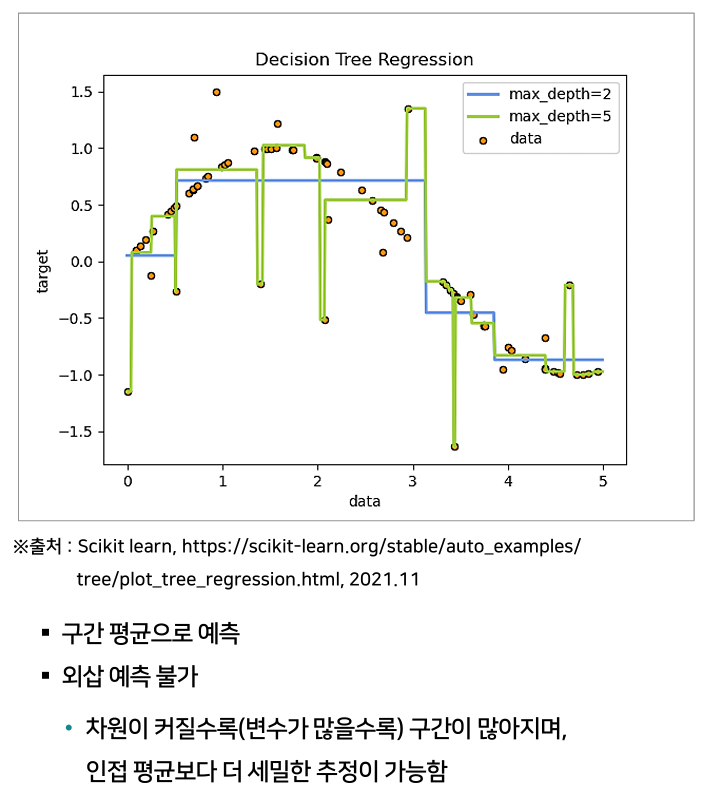

In [1]:
from IPython.display import Image
Image("img/img04_01.png")

Decision Tree 회귀 - 결정계수 (R^2): 0.5097629887358219
Decision Tree 회귀 - 평균 절대 오차 (MAE): 0.5978280732432436


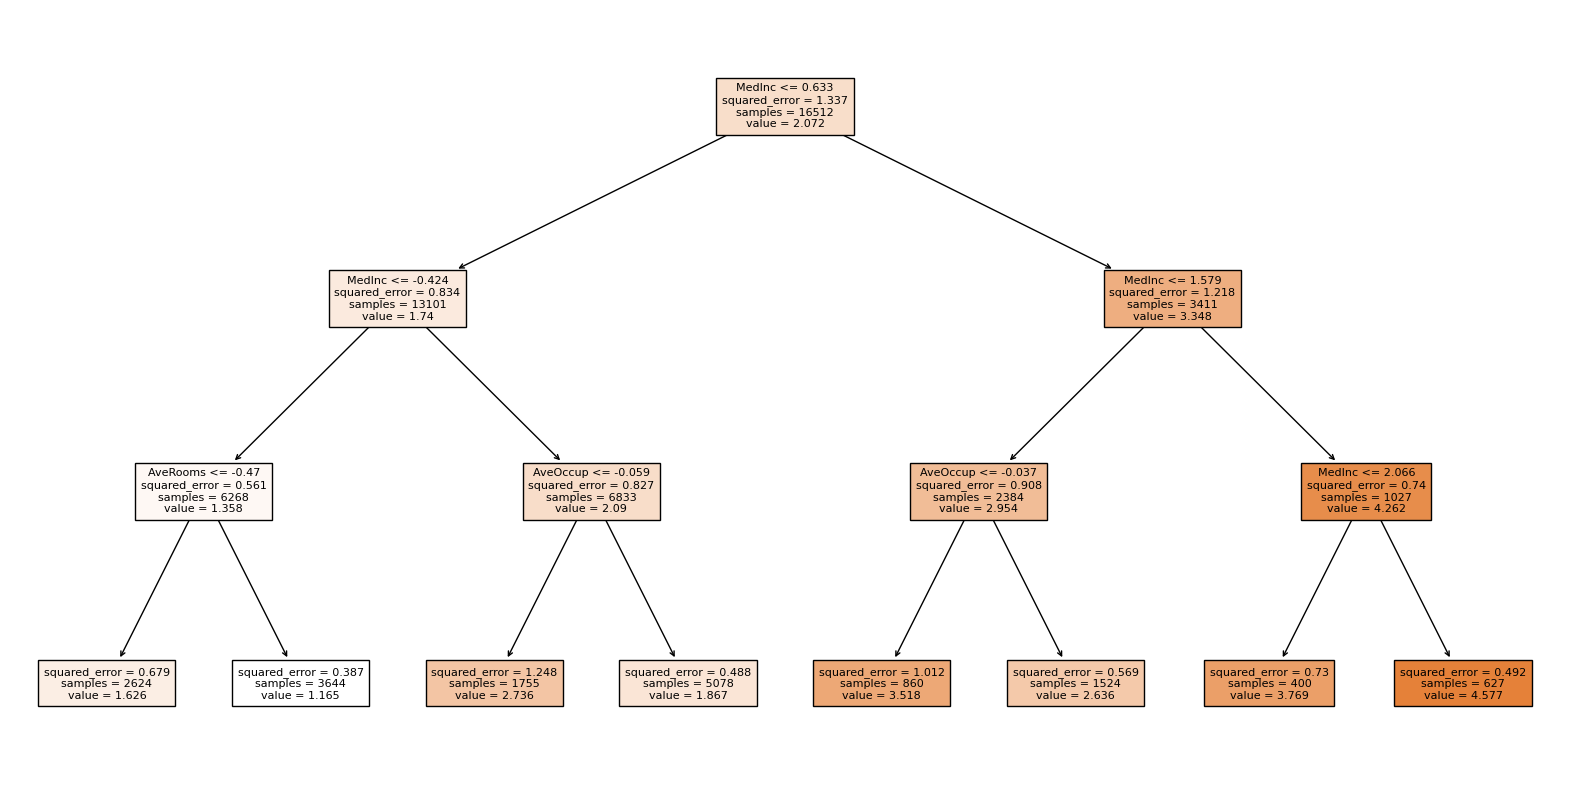

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, r2_score

# 캘리포니아 주택가격 데이터셋 로드
california = fetch_california_housing()

# 특성과 타깃 변수를 분리
X, y = california.data, california.target

# 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 생성 및 훈련 (트리 깊이 제한)
tree = DecisionTreeRegressor(random_state=42, max_depth=3)
tree.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = tree.predict(X_test)

# 결정계수 (R^2) 계산
r2 = r2_score(y_test, y_pred)
print(f"Decision Tree 회귀 - 결정계수 (R^2): {r2}")

# 평균 절대 오차 (MAE) 계산
mae = mean_absolute_error(y_test, y_pred)
print(f"Decision Tree 회귀 - 평균 절대 오차 (MAE): {mae}")

# 트리 구조 시각화
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=california.feature_names, fontsize=8)
plt.show()

##  2. KNeighborsRegressor
> - 예측 데이터와 가장 가까운 k개의 학습 데이터의 평균y 값으로 예측함 <br>
> - 거리를 기반으로 하는 모델은 스케일링이 필수적이다.

KNeighborsRegressor - 최적의 k 값: 11
KNeighborsRegressor - 결정계수 (R^2): 0.6805629031793323
KNeighborsRegressor - 평균 절대 오차 (MAE): 0.43843182302677935


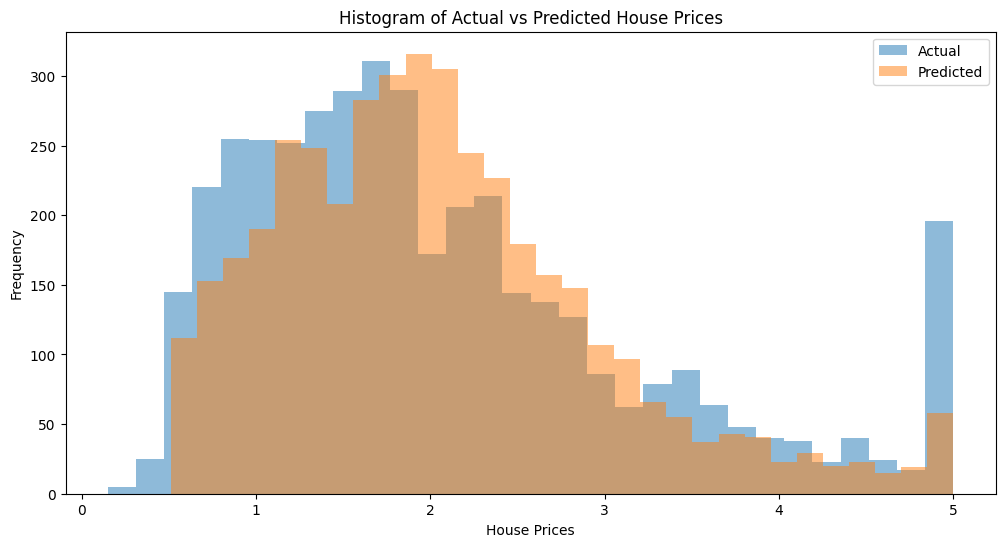

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 캘리포니아 주택가격 데이터셋 로드
california = fetch_california_housing()

# 특성과 타깃 변수를 분리
X, y = california.data, california.target

# 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNeighborsRegressor 모델 생성
knn = KNeighborsRegressor()

# 교차 검증을 사용하여 최적의 k 값 찾기
param_grid = {'n_neighbors': np.arange(1, 30)}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# 최적의 k 값으로 모델 생성
best_k = grid_search.best_params_['n_neighbors']
knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = knn_best.predict(X_test)

# 결정계수 (R^2) 계산
r2 = r2_score(y_test, y_pred)
print(f"KNeighborsRegressor - 최적의 k 값: {best_k}")
print(f"KNeighborsRegressor - 결정계수 (R^2): {r2}")

# 평균 절대 오차 (MAE) 계산
mae = mean_absolute_error(y_test, y_pred)
print(f"KNeighborsRegressor - 평균 절대 오차 (MAE): {mae}")

# 히스토그램 시각화
plt.figure(figsize=(12, 6))
plt.hist(y_test, bins=30, alpha=0.5, label='Actual')
plt.hist(y_pred, bins=30, alpha=0.5, label='Predicted')
plt.xlabel('House Prices')
plt.ylabel('Frequency')
plt.title('Histogram of Actual vs Predicted House Prices')
plt.legend()
plt.show()

## 3. SVR( Support Vector Regression )
> MSE와L2 손실을 최소화하기 위해 KNeighborsRegressor처럼 스케일링을시행해야함

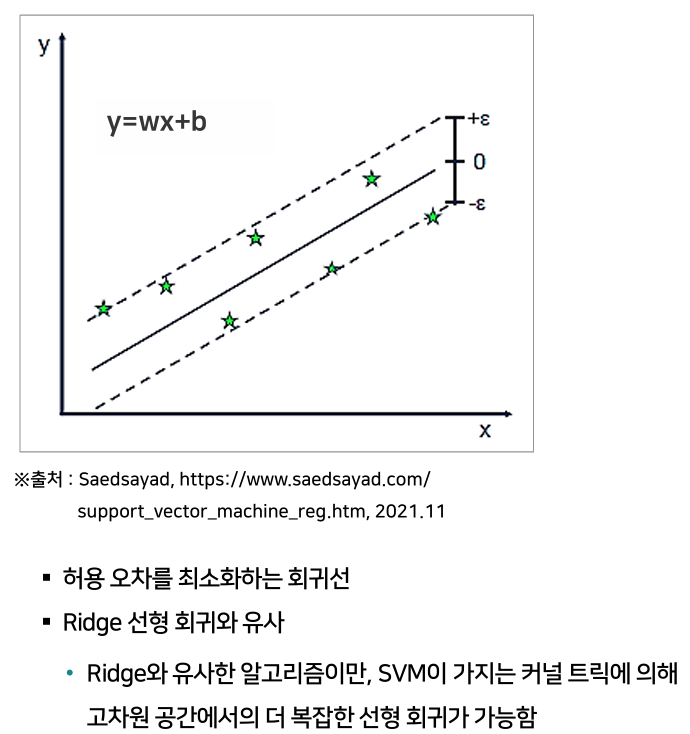

In [7]:
Image("img/img04_02.png")

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

# 캘리포니아 주택가격 데이터셋 로드
california = fetch_california_housing()

# 특성과 타깃 변수를 분리
X, y = california.data, california.target

# 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 생성 및 훈련
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = svr.predict(X_test)

# 결정계수 (R^2) 계산
r2 = r2_score(y_test, y_pred)
print(f"SVR 회귀 - 결정계수 (R^2): {r2}")

# 평균 절대 오차 (MAE) 계산
mae = mean_absolute_error(y_test, y_pred)
print(f"SVR 회귀 - 평균 절대 오차 (MAE): {mae}")

# # 결과 시각화
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred, alpha=0.3)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title(f'Support Vector Regression\n$R^2$ = {r2:.2f}, MAE = {mae:.2f}')
# plt.show()

SVR 회귀 - 결정계수 (R^2): 0.7275639524733043
SVR 회귀 - 평균 절대 오차 (MAE): 0.3985982830145758
